# New tasks:
- make a function/object that read a fasta file from disk and **yields** (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comment
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU


>AJGHDJHASGDJAS khsk skdjfhskdj slkshd skhksjdf
CACGUAGCAUGCUAGCAUGCUAGCAUGCUAGCUAGCUGAC 276512764523765423764527365427365427542735427
CAUCGUAGCUAGCUAGCUAGCUACG
AUCGUAGUAGCUAGCUAGCUAGCUAGC

- yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU)
(AJGHDJHASGDJAS khsk skdjfhskdj slkshd skhksjdf, CACGUAGCAUGCUAGCAUGCUAGCAUGCUAGCUAGCUGACCAUCGUAGCUAGCUAGCUAGCUACGAUCGUAGUAGCUAGCUAGCUAGCUAGC)

- separately:
- make a function that receives in input the list of sequences, and yields structure graphs (use RNAfold)



1. test if space or tab
2. test if command (after a space or any latter exept 'aucg' or 'rnytkmswbdhvgu')
3. test if new line without header then concatenate
4. test if new line with header then new graph

In [84]:
%matplotlib inline
import os, sys
import subprocess as sp
from itertools import cycle
import networkx as nx
import re
from eden.util import display

#class names with CamelStyle
#function names with underscore_style
#always named arguments to functions
class FastaToGraph(object):
    def __init__(self, mode= 'RNAfold'):
        #pass
        self.mode = mode
    
    def _sequeceWrapper(self, file_path=None):
        #path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        head, seq = self._readFastaFile(file_path)
        seqs = self._removeCommends(head, seq)
        #seq = self._fold(seqs)
        #print ("path", path)
        return head, seqs
    
    def _fold(self, seq):
        head, seq, struc = self._get_sequence_structure(seq)
        #G = self._make_graph(seq, struc)
        return  head, seq, struc 
    
    
# read a fasta file separate the head and the sequence
    def _readFastaFile(self, file_path=None):
        head_start = '>'
        head = []
        seq = []
        seq_temps = []
        string_seq = ''        

        #for file in os.listdir(path): #open file
        read_file = open(file_path,'r')            
            # seperate the head and the sequence
        for line in read_file:
            lines = list(line)
            # the read line is the head of the sequence write it in head list
            if lines[0] == head_start:
                line = line.strip('\n')
                line = line.strip(head_start)
                head.append(line)
                seq.append(string_seq)
                seq_temps = []

            # the read line is a sequence writ it in a sequence list
            if lines[0] != head_start:
                seq_temps.append(line)
                string_seq= ''.join(seq_temps)
                
        seq.append(string_seq)
        seq = filter(None, seq)
        head_seq_zip = zip(head, seq)
        print ('Sequences with comments', head_seq_zip)
        return head, seq
    
    
    #read a line ignore string after the whitspace, tab and not (a,c,g,u)
    def _removeCommends(self, head, seq):
        not_added_string = []
        input_seqs = seq
        sequences = []
        seqs = []
        
        for seq in input_seqs:
            seqs_temp = []
            for i, letter in enumerate(seq):                 
                if letter == "A" or letter == "C" or letter == "G" or letter == "U":
                    seq_list = []
                    seq_list = ''.join(letter)
                    seqs_temp.append(seq_list)
                    
                else:
                    if letter == " " or letter != "A" or letter != "C" or letter != "G" or letter != "U":
                        not_added_string.append(letter)
            seqs.append(seqs_temp)
        
        for seq in seqs:
            string_seqs = ''
            string_seqs = ''.join(seq)
            sequences.append(string_seqs)
            
        #print ("sequences", sequences)     
        #print ('final not_added:', not_added_string)
        head_seq_zip = zip(head, sequences)
        print ('Sequences with comments',head_seq_zip)
        return  head_seq_zip

    
        #call RNAfold to get the sequence structure
    def _get_sequence_structure(self, seqs):
        if self.mode == 'RNAfold':
            for seq in seqs:
                return self._rnafold_wrapper(seqs)
        else:
            raise Exception('Not known: %s'% self.mode)
    
    def _rnafold_wrapper(self, sequence):
        print ("sequence", sequence)
        head = sequence[0]
        seq = sequence[1].split()[0]
        flags='--noPS'
        cmd = 'echo "%s" | RNAfold %s' % (seq, flags)
        out = sp.check_output(cmd, shell=True)
        #print out
        text = out.strip().split('\n')
        seq = text[0]
        struc = text[1].split()[0]
        return head, seq, struc
        
        #Recognize basepairs and add them to the generated graph
    def _make_graph(self, head, seq, struc):
            #print ("seq-graph", seq)
            #print ("struc-graph", struc)
            print ("Graph title", head)
            open_pran = "("
            close_pran = ")"
            stack_o = []
            stack_c = []
            G = nx.Graph()
            seq_struc_zip = zip(seq, struc)
            #print seq_struc_zip
            for i, k in enumerate(struc):
                G.add_node(i, label = seq[i])
                # connect with the next node
                if i > 0:
                    G.add_edge(i-1, i, label= 'x')
                    
                # find basepair and connect them
                if struc[i] == open_pran:
                    j = i
                    stack_o.append(struc[j])
                    open_len = len(stack_o)

                if struc[i] == close_pran:
                    stack_c.append(struc[i])
                    stack_o.pop()
                    G.add_edge(i, j, label = 'b')
                    j = j-1

            return G 

# Experiment

In [85]:
#Read fasta files and separate sequences from the head of the sequence
fgraph = FastaToGraph()
path = "/home/alshaikm/EDeN_examples/fasta/testfasta"
head, seqs = fgraph._sequeceWrapper(path)

#for seq in seqs:
#    h, s = seq
#    print ("h", h)
#    print ("s", s)

('Sequences with comments', [('AB009835.1/1-72', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC\n'), ('AB009835.1/1-71', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\nACUUCUAAUGA\n'), ('AB003409.1/96-167', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\nCCAGUGGGUCCA\n')])
('Sequences with comments', [('AB009835.1/1-72', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC'), ('AB009835.1/1-71', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA'), ('AB003409.1/96-167', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA')])


('sequence', ('AB009835.1/1-72', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC'))
('Graph title', 'AB009835.1/1-72')


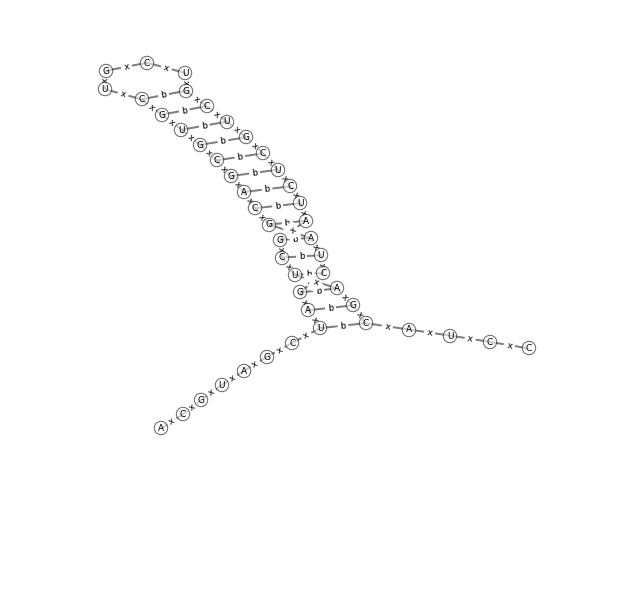

('sequence', ('AB009835.1/1-71', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA'))
('Graph title', 'AB009835.1/1-71')


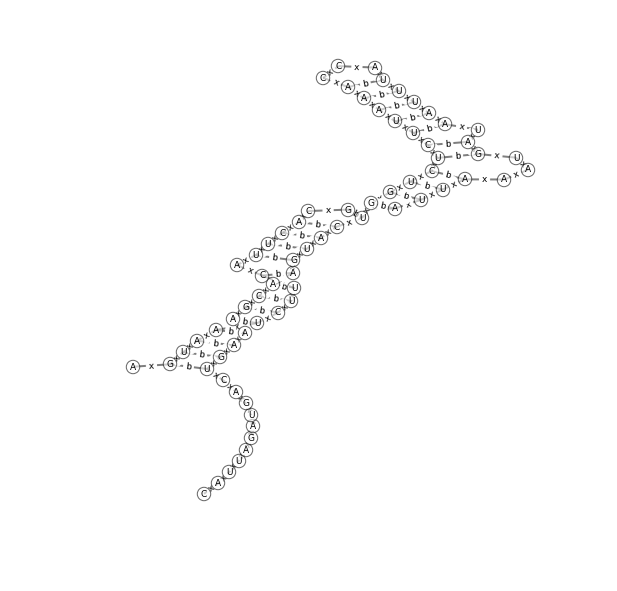

('sequence', ('AB003409.1/96-167', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA'))
('Graph title', 'AB003409.1/96-167')


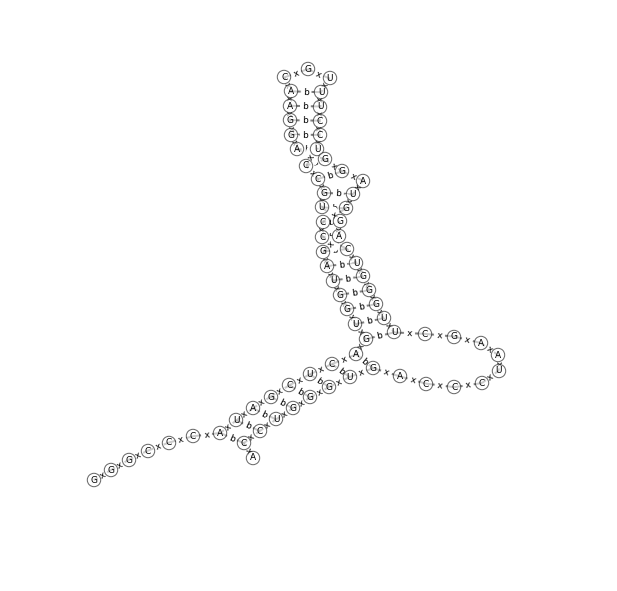

In [86]:
#generating the graph
for seq in seqs:
    head, seq, struc =fgraph._fold(seq)
    G = fgraph._make_graph(head, seq, struc)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')